# Intialize

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class as Class_sz
# import os
# import time

Using PATH_TO_COSMOPOWER_ORGANIZATION: jk/cosmopower-organization
Directory jk/cosmopower-organization does not exist. Falling back to default path.
Defaulting to: /Users/boris/cosmopower-organization
Found cosmopower-organization directory with all repositories at: /Users/boris/cosmopower-organization
PATH_TO_COSMOPOWER_ORGANIZATION is not correctly set. Setting it now...
PATH_TO_COSMOPOWER_ORGANIZATION is set to /Users/boris/cosmopower-organization


In [2]:
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators and to avoid any ambiguity when comparing with camb. 
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665   

}

# a simple conversion from cl's to dl's
def l_to_dl(lp):
    return lp*(lp+1.)/2./np.pi

# Compute CMB power spectra

In [3]:
%%time 
classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set({
'output':'tCl,lCl,pCl',
})
classy_sz.compute_class_szfast()

CPU times: user 556 ms, sys: 85 ms, total: 641 ms
Wall time: 96.9 ms


In [4]:
lensed_cls = classy_sz.lensed_cl()
l_fast = lensed_cls['ell']
cl_tt_fast = lensed_cls['tt']
cl_ee_fast = lensed_cls['ee']
cl_te_fast = lensed_cls['te']
cl_pp_fast = lensed_cls['pp']


# Plot CMB power spectra

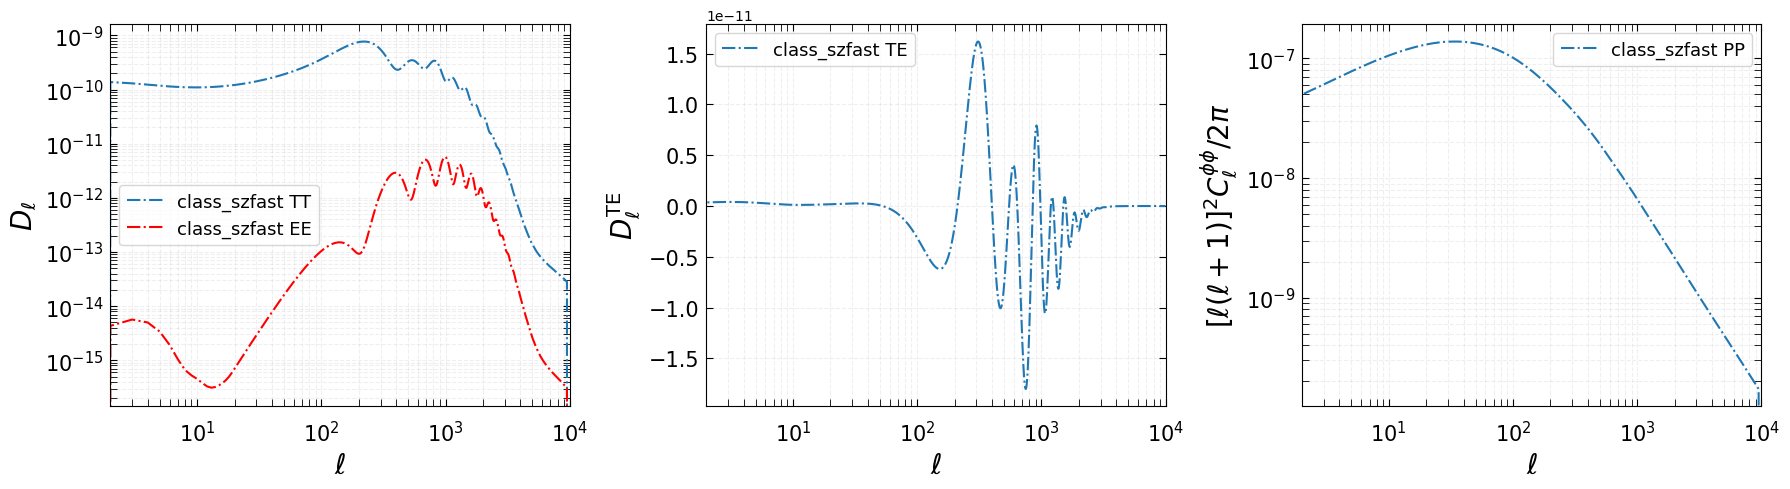

In [5]:
label_size = 15
title_size = 20
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')


ax.plot(l_fast,l_to_dl(l_fast)*cl_tt_fast,ls='-.',label='class_szfast TT')


ax.plot(l_fast,l_to_dl(l_fast)*cl_ee_fast,ls='-.',c='red',label='class_szfast EE')



ax.set_ylabel(r"$D_\ell$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(2,1e4)
ax.legend(fontsize=legend_size)


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')



ax.plot(l_fast,l_to_dl(l_fast)*cl_te_fast,ls='-.',label='class_szfast TE')


ax.set_ylabel(r"$D_\ell^\mathrm{TE}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_xscale('log')
ax.set_xlim(2,1e4)
ax.legend(fontsize=legend_size)


ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')


ax.plot(l_fast,l_to_dl(l_fast)*cl_pp_fast*(l_fast*(l_fast+1.)),ls='-.',label='class_szfast PP')

ax.set_ylabel(r"$[\ell(\ell+1)]^2 C_\ell^{\phi\phi}/2\pi$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(2,1e4)
ax.legend(fontsize=legend_size)
fig.tight_layout()


# Time computation of CMB Cl's

In [5]:
%timeit -n 5 classy_sz.compute_class_szfast()

21.8 ms ± 1.5 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


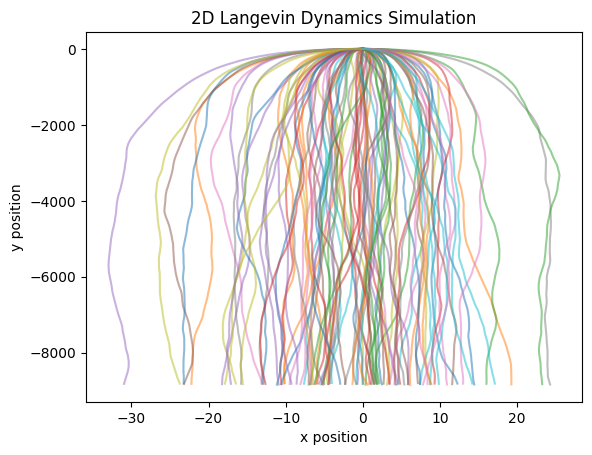

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation Parameters
n_particles = 100  # Number of particles
mass = 1.0  # Particle mass
gamma = 0.1  # Friction coefficient
dt = 0.01  # Time step
T = 100  # Total simulation time
n_steps = int(T / dt)  # Number of steps
k_B = 1.0  # Boltzmann constant
temperature = 1.0  # Temperature of the system

# External force (e.g., gravity in 2D)
F_ext = np.array([0.0, -9.8])

# Initialize positions and velocities
positions = np.zeros((n_particles, 2))  # 2D positions
velocities = np.random.randn(n_particles, 2)  # Initial velocities (Gaussian distributed)

# Helper function for random force
def random_force(mass, gamma, temperature, dt):
    return np.sqrt(2 * gamma * k_B * temperature / mass) * np.random.randn(2)

# Simulation loop
positions_over_time = np.zeros((n_steps, n_particles, 2))  # Store positions at each step
for step in range(n_steps):
    for i in range(n_particles):
        # Compute the random force (thermal fluctuations)
        eta = random_force(mass, gamma, temperature, dt)
        
        # Update velocity: v(t + dt) = v(t) + (-gamma * v + F_ext + eta) * dt / m
        velocities[i] += (F_ext - gamma * velocities[i] + eta) * dt / mass
        
        # Update position: r(t + dt) = r(t) + v(t) * dt
        positions[i] += velocities[i] * dt

    # Store positions for later analysis/plotting
    positions_over_time[step] = positions

# Visualization of particle trajectories
for i in range(n_particles):
    plt.plot(positions_over_time[:, i, 0], positions_over_time[:, i, 1], alpha=0.5)

plt.xlabel('x position')
plt.ylabel('y position')
plt.title('2D Langevin Dynamics Simulation')
plt.show()


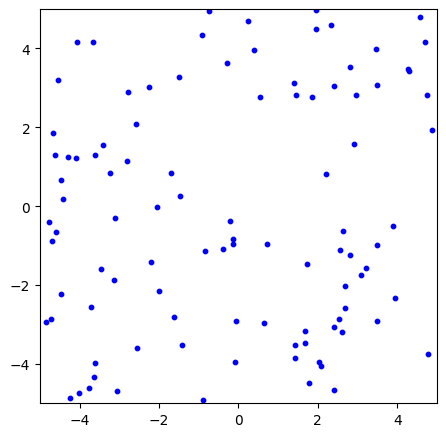

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Simulation Parameters
n_particles = 100  # Number of particles
mass = 1.0  # Particle mass
gamma = 0.1  # Friction coefficient
dt = 0.01  # Time step
T = 10  # Total simulation time
n_steps = int(T / dt)  # Number of steps
k_B = 1.0  # Boltzmann constant
temperature = 1.0  # Temperature of the system
box_size = 10.0  # Size of the 2D box containing the particles

# External force (e.g., gravity in 2D)
F_ext = np.array([0.0, -0.1])  # Weak gravitational force

# Initialize positions and velocities
positions = np.random.uniform(-box_size / 2, box_size / 2, (n_particles, 2))  # 2D positions
velocities = np.random.randn(n_particles, 2)  # Initial velocities (Gaussian distributed)

# Helper function for random force
def random_force(mass, gamma, temperature, dt):
    return np.sqrt(2 * gamma * k_B * temperature / mass) * np.random.randn(2)

# Store positions for animation
positions_over_time = np.zeros((n_steps, n_particles, 2))

# Simulation loop
for step in range(n_steps):
    for i in range(n_particles):
        # Compute the random force (thermal fluctuations)
        eta = random_force(mass, gamma, temperature, dt)
        
        # Update velocity: v(t + dt) = v(t) + (-gamma * v + F_ext + eta) * dt / m
        velocities[i] += (F_ext - gamma * velocities[i] + eta) * dt / mass
        
        # Update position: r(t + dt) = r(t) + v(t) * dt
        positions[i] += velocities[i] * dt

        # Apply periodic boundary conditions (particles re-enter the box from the other side)
        positions[i] = np.mod(positions[i] + box_size / 2, box_size) - box_size / 2

    # Store positions for later analysis/plotting
    positions_over_time[step] = positions

# Create a figure for animation
fig, ax = plt.subplots(figsize=(5.12, 5.12))  # 512x512 pixels figure
ax.set_xlim(-box_size / 2, box_size / 2)
ax.set_ylim(-box_size / 2, box_size / 2)
scat = ax.scatter(positions[:, 0], positions[:, 1], s=10, color='blue')

# Update function for the animation
def update(frame):
    scat.set_offsets(positions_over_time[frame])
    return scat,

# Create animation
ani = FuncAnimation(fig, update, frames=n_steps, interval=50, blit=True)

# # Show the animation
# plt.show()


In [8]:
ani

In [9]:
ani.save('/Users/boris/Desktop/langevin_simulation.mp4', writer='ffmpeg', fps=30)